In [7]:
'''
MULTY VARIABLE LENEAR REGRESSION

'''

'\nMULTY VARIABLE LENEAR REGRESSION\n\n'

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('dulieuxettuyendaihoc.csv', header = 0, delimiter=',', encoding='unicode_escape')
df = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6','DH1', 'DH2', 'DH3', 'GT', 'KV', 'KT', 'DT']]
df

,T1,T2,T3,T4,T5,T6,DH1,DH2,DH3,GT,KV,KT,DT
0,7.2,8.4,7.4,7.2,7.4,6.9,3.25,3.25,4.50,F,2NT,A1,NaN
1,5.4,6.3,4.3,4.9,3.0,4.0,6.00,4.00,3.50,M,1,C,NaN
2,5.6,5.0,2.8,6.1,4.8,5.7,5.00,6.75,4.00,M,1,C,NaN
3,6.6,5.1,5.9,4.1,6.1,7.4,4.25,4.25,5.25,M,1,D1,NaN
4,6.0,5.4,7.6,4.4,6.8,8.0,4.25,4.50,5.00,M,2NT,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.6,8.9,7.7,6.7,7.9,6.6,5.25,1.50,6.25,F,1,C,NaN
96,3.7,4.1,3.1,3.4,5.5,5.7,5.25,3.75,4.75,F,1,C,NaN
97,8.8,9.5,9.5,8.5,9.0,8.5,7.00,8.00,4.00,M,2NT,C,NaN
98,2.7,2.8,6.2,5.2,4.1,4.3,5.00,3.50,5.50,M,1,C,NaN


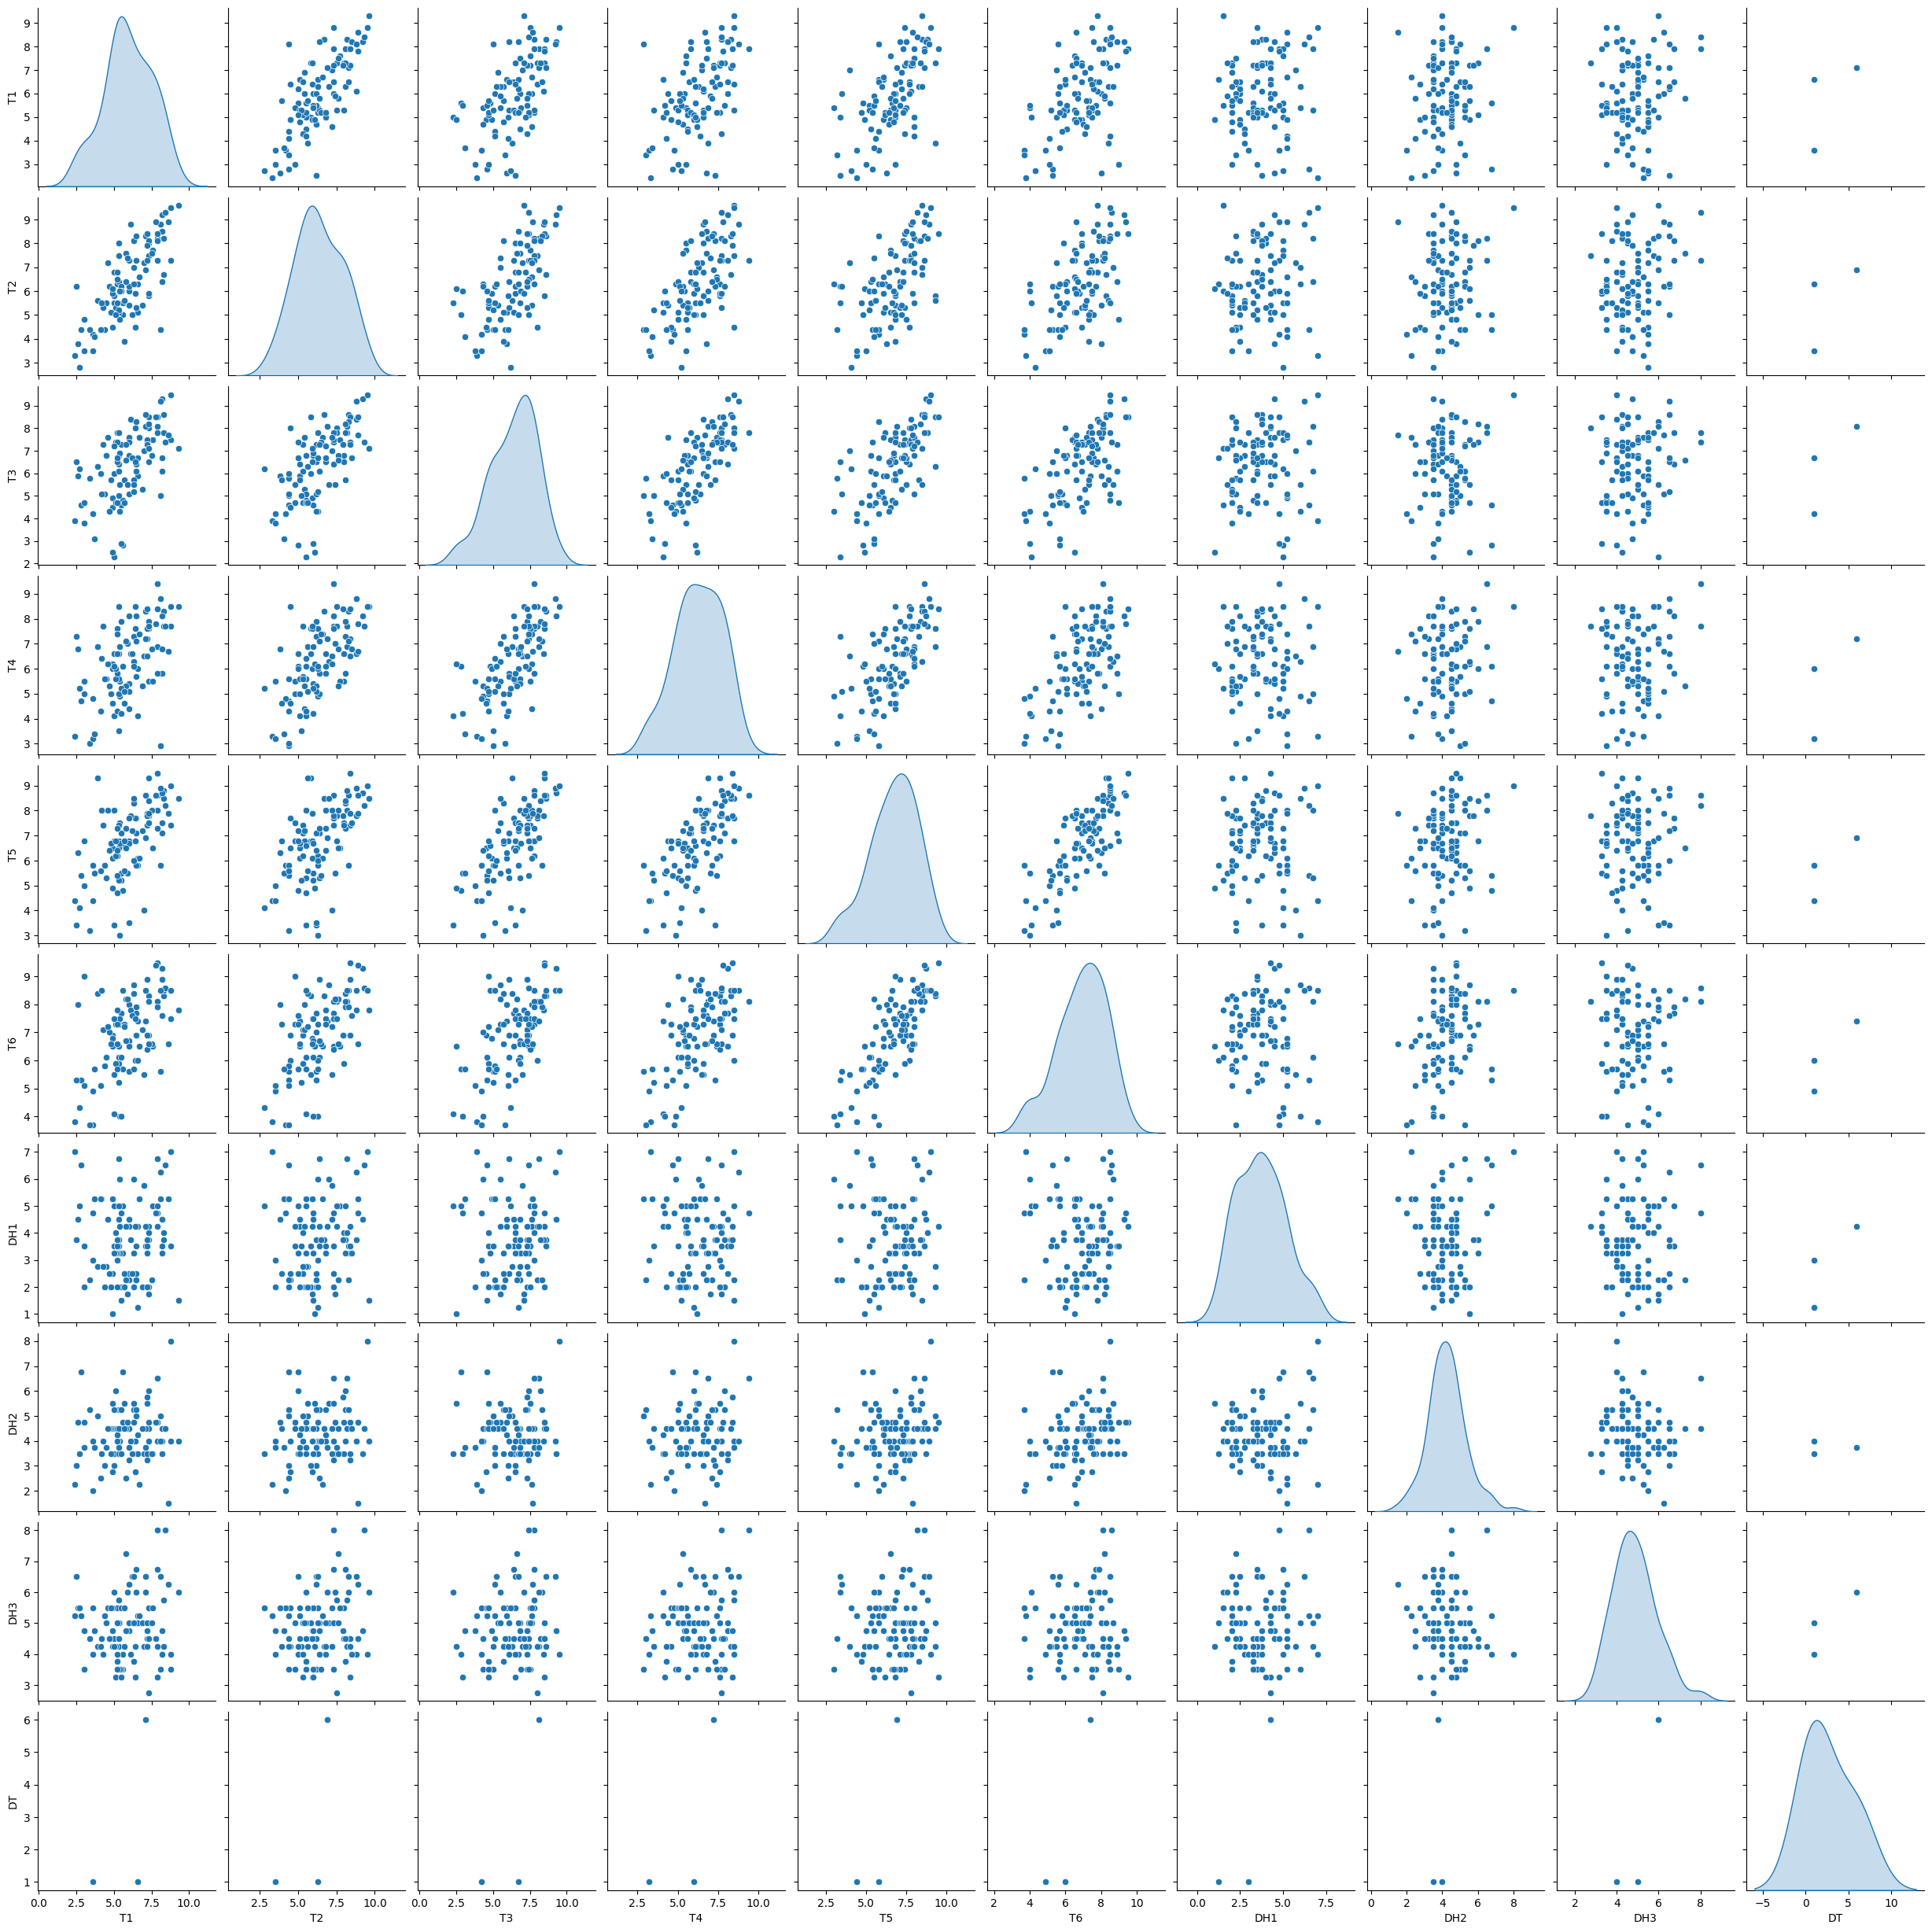

In [10]:
sns.pairplot(data=df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6','DH1', 'DH2', 'DH3', 'GT', 'KV', 'KT', 'DT']],diag_kind='kde')

In [11]:
'''
Dự báo điểm thi DH1 dựa trên trung bình điểm toán của 6 học kỳ năm cấp 3
Input: T1 T2 T3 T4 T5 T6
Output: DH1 = f(T1,T2,T3,T4,T5,T6)

Lựa chọn mô hình hồi quy đa biến

Y = A0 + A1*X1 + A2*X2 + A3*X3 + A4*X4 + A5*X5 + A6*X6 + epsilon

Áp dụng mô hình vào bài toán ta có 
DH1 = A0 + A1*T1 + A2*T2 + A3*T3 + A4*T4 +A5*T5 +A6*T6 + epsilon
'''

'\nDự báo điểm thi DH1 dựa trên trung bình điểm toán của 6 học kỳ năm cấp 3\nInput: T1 T2 T3 T4 T5 T6\nOutput: DH1 = f(T1,T2,T3,T4,T5,T6)\n\nLựa chọn mô hình hồi quy đa biến\n\nY = A0 + A1*X1 + A2*X2 + A3*X3 + A4*X4 + A5*X5 + A6*X6 + epsilon\n\nÁp dụng mô hình vào bài toán ta có \nDH1 = A0 + A1*T1 + A2*T2 + A3*T3 + A4*T4 +A5*T5 +A6*T6 + epsilon\n'

In [12]:
'''
Xây dựng mô hình hồi quy đa biến
'''

X = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6']].values
y = df[['DH1']].values

#Chia làm 2 tập train và test tỉ lệ 0.8 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
from sklearn import linear_model

model=linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
model.coef_

array([[-0.1154772 ,  0.24314771,  0.24633911, -0.27728123,  0.07813302,
        -0.08504148]])

In [15]:
model.intercept_

array([3.05624883])

In [16]:

# Mô hình sau khi chạy ML
# DH1 = 3.05624883 - 0.1154772*T1 + 0.24314771*T2 + 0.24633911*T3 - 0.27728123*T4 + 0.07813302*T5 -0.08504148*T6 + epsilon

In [17]:
print('Score: ',model.score(X_train,y_train))
print('Score: ',model.score(X_test,y_test))

Score:  0.062043198648279674
Score:  0.02523442511733487


<function matplotlib.pyplot.show(close=None, block=None)>

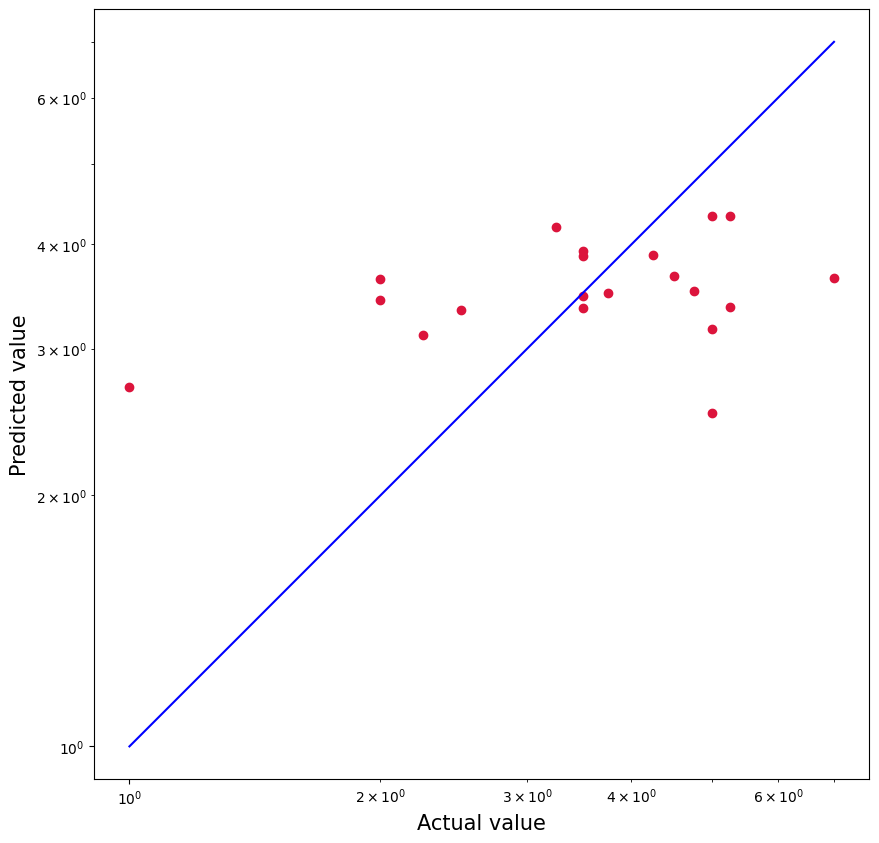

In [18]:
'''
Trực quan hoá dữ liệu dự báo và thực tế của mô hình trên tập test y_test là thực tế lấy từ tập dữ liệu
các hàm max min (lấy 2 đường thẳng lớp nhất và nhỏ nhất, sao đó lấy đường chéo, điểm càng gần đường chéo thì mô hình càng tốt)
'''
y_test_predicted= model.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test,y_test_predicted,c='crimson' )
plt.yscale('log')
plt.xscale('log')


p1 = max(max(y_test_predicted),max(y_test))
p2 = min(min(y_test_predicted),min(y_test))

plt.plot([p1,p2],[p1,p2],"b-")

plt.xlabel('Actual value', fontsize=15)
plt.ylabel('Predicted value', fontsize=15)

plt.axis('equal')
plt.show

In [19]:
# Lưu mô hình xuống ổ đĩa thành file mang tên mymodel.sav

import pickle 
pickle.dump(model,open('mymodel.sav','wb'))